## **Getting started**

**Business Objective:**

“Will a customer accept the coupon?” The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those who did not.

**Problem Statement:** Determine which features are most strongly associated with coupon acceptance and provide actionable insights.


**Proposed Process Resolution:**
This notebook analyzes the factors influencing coupon acceptance (Y=1) versus non-acceptance (Y=0):
Coupon Acceptance/Rejection Fetures Discovery/Analysis/Correlation. Including data clensing, correlation analysis, and visualizations that compares key features.


**Findings:**
  **Age** and certain time thresholds (e.g., **toCoupon_GEQ15min** and **toCoupon_GEQ25min**) are strong predictors of coupon acceptance.
  **Some features, like **temperature**, are more related to coupon rejection.



In [101]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

import os
from google.colab import files


# for UCB 5.1 Coupan db cleanup, exploration, analysis, feature engineering

# Data Cleaning & Preparation

## Steps:
### 1. Remove rows with missing values in key columns.
### 2. Drop duplicate rows.
### 3. Convert specific columns to numeric.
### 4. Split the dataset into coupon accepted (Y=1) and not accepted (Y=0).
### 5. Cap outliers at the 1st and 99th percentiles.
### 6. Measure strongest correlation
### 7. Check Violin charts to confirm

#  Correlation Analysis
## Coupon Acceptance Analysis

## The top three features correlated with coupon acceptance are:
### - **age**
### - **toCoupon_GEQ15min**
### - **toCoupon_GEQ25min**

# least correlated: direction_same

# Recommendation:
## Target by Age, timing, as they are most correlated with coupon acceptance.


In [102]:
#file list
files = os.listdir('/content/')
print(files)

['.config', '5_top3_features_not_accepting_coupon.png', '4_top3_features_accepting_coupon.png', '3_coupon_csv-clean-accept-no.csv', '2_coupon_csv-clean-accept-yes.csv', 'coupons.csv', 'sample_data']


In [ ]:
# upload data csv files, uncomment
# uploaded = files.upload()

In [104]:
#load data
cpn = pd.read_csv('/content/coupons.csv')
# print(cpn.count())

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64


In [105]:

# CLEANUP dropna, remove duplicates ( from 12K to 40-60 ) & split datasets for yes/no coupons

# index and Define key columns for cleaning
cpn.reset_index()

key_columns = [
    'car', 'Bar', 'coupon', 'CoffeeHouse', 'CarryAway',
    'RestaurantLessThan20', 'Restaurant20To50', 'temperature',
    'age', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
    'direction_same', 'Y', 'direction_same','destination','passanger'
    ]

# Find dups
# cpnduplicates = cpn.duplicated(subset = 'Y', keep = False)
# print(cpnduplicates(count))

# Remove missing and duplicates
cpn = cpn.dropna(subset=key_columns).drop_duplicates().copy()

# print( "cpn count" )
# print( cpn.count() )
# print("------------------------------------------")

# Define numeric colmns  & coerce type
numeric_cols = [
    'temperature', 'age', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
    'toCoupon_GEQ25min', 'direction_same', 'Y', 'destination','passanger'
]

# # Remove missing and duplicates
cpn = cpn.dropna(subset=numeric_cols).drop_duplicates().copy()

# print( "cpn count" )
# print( cpn.count() )
# print("------------------------------------------")


# print( "cpn  count" )
# print( cpn.count() )
# print("------------------------------------------")

# force to numeric
for col in numeric_cols:
    cpn[col] = pd.to_numeric(cpn[col], errors='coerce')

# Split data based on coupon acceptance or not
cpnYes = cpn[cpn['Y'] == 1].copy()
cpnNo  = cpn[cpn['Y'] == 0].copy()

# print("cpn yes count")
# print( cpnYes.count() )
# print("------------------------------------------")

# print("cpn no count")
# print( cpnNo.count() )
# print("------------------------------------------")
# cpn.dtypes

In [106]:

# OUTLIERS CLEANUP for yes and no coupon dataset split
## Cap outliers for each numeric column in both groups (1st to 99th percentiles)
for col in numeric_cols:
    lower_cap_yes = cpn[col].quantile(0.01)
    upper_cap_yes = cpn[col].quantile(0.99)
    cpn[col] = cpn[col].clip(lower_cap_yes, upper_cap_yes)

    lower_cap_yes = cpnYes[col].quantile(0.01)
    upper_cap_yes = cpnYes[col].quantile(0.99)
    cpnYes[col] = cpnYes[col].clip(lower_cap_yes, upper_cap_yes)

    lower_cap_no = cpnNo[col].quantile(0.01)
    upper_cap_no = cpnNo[col].quantile(0.99)
    cpnNo[col] = cpnNo[col].clip(lower_cap_no, upper_cap_no)

#save clean data file
cpnYes.to_csv('2_coupon_csv-clean-accept-yes.csv', index=False)
cpnNo.to_csv('3_coupon_csv-clean-accept-no.csv', index=False)


In [107]:

#  CORRELATION ANALYSIS
#  Coupon Acceptance Analysis
#
# The top three features correlated with coupon acceptance are:
# - **age**
# - **toCoupon_GEQ15min**
# - **toCoupon_GEQ25min**
#

# Corr matrix numeric: ID features strongly associated with coupon acceptance.
# Features with high positive correlation are more prevalent in the coupon accepted group.

# %% [code]
# Compute overall correlation matrix
corr_matrix = cpn[numeric_cols].corr()
print("Overall Correlation with Y=1 Acceptanc")
print(corr_matrix['Y'].sort_values(ascending=False))

# Identify top features by absolute correlation with Y (excluding Y itself)
corr_features = corr_matrix['Y'].drop('Y').abs().sort_values(ascending=False)
print("\nFeatures sorted by absolute correlation with Y:")
print(corr_features)

nocorr_features = corr_matrix['Y'].drop('Y').abs().sort_values(ascending=True)
print("\nFeatures sorted by Least correlation with Y:")
print(nocorr_features)

# %% [markdown]


Overall Correlation with Y=1 Acceptanc
Y                    1.000000
toCoupon_GEQ25min    0.053682
direction_same      -0.002065
toCoupon_GEQ15min   -0.034143
temperature         -0.039738
age                 -0.239270
toCoupon_GEQ5min          NaN
destination               NaN
passanger                 NaN
Name: Y, dtype: float64

Features sorted by absolute correlation with Y:
age                  0.239270
toCoupon_GEQ25min    0.053682
temperature          0.039738
toCoupon_GEQ15min    0.034143
direction_same       0.002065
toCoupon_GEQ5min          NaN
destination               NaN
passanger                 NaN
Name: Y, dtype: float64

Features sorted by Least correlation with Y:
direction_same       0.002065
toCoupon_GEQ15min    0.034143
temperature          0.039738
toCoupon_GEQ25min    0.053682
age                  0.239270
toCoupon_GEQ5min          NaN
destination               NaN
passanger                 NaN
Name: Y, dtype: float64


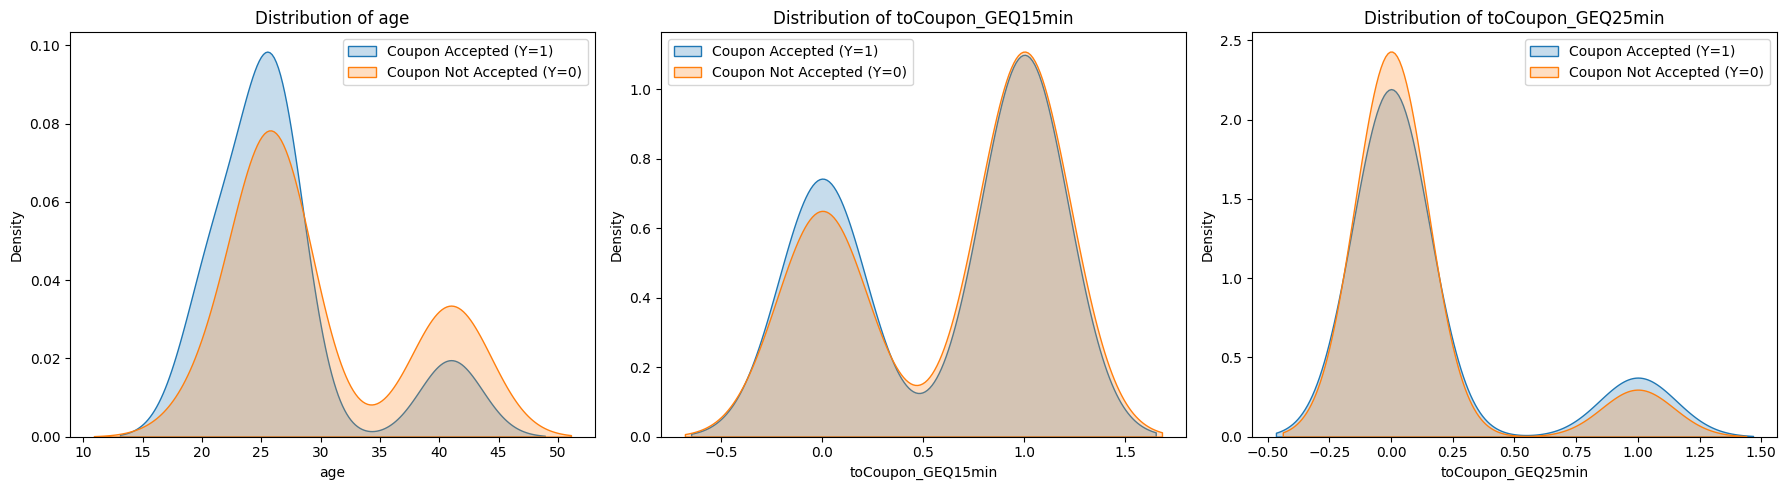

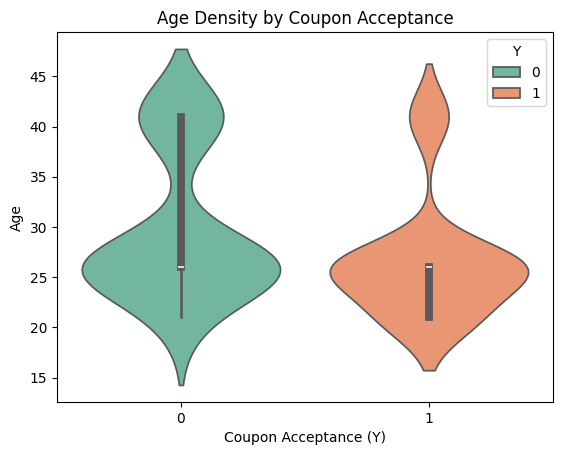

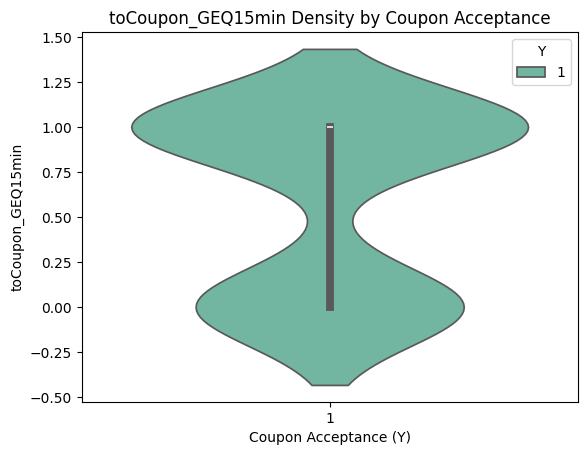

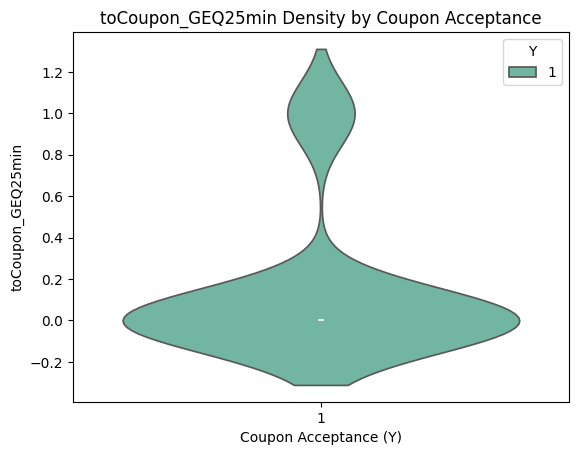

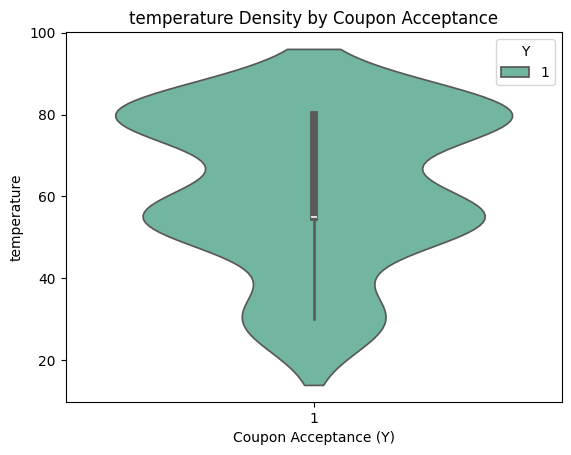

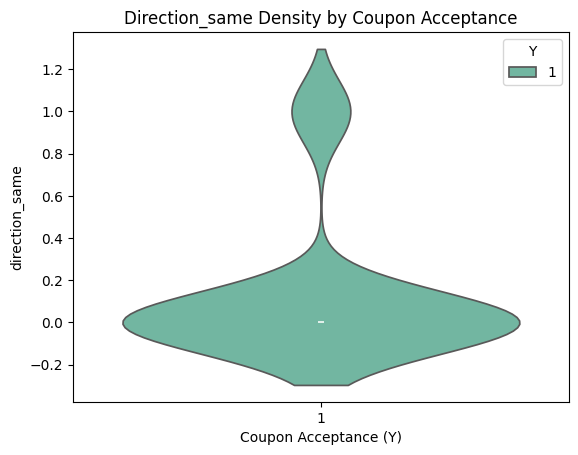


Features sorted by correlation with Y=1 Coupon Acceptance (ascending):
age                 -0.239270
temperature         -0.039738
toCoupon_GEQ15min   -0.034143
direction_same      -0.002065
toCoupon_GEQ25min    0.053682
toCoupon_GEQ5min          NaN
destination               NaN
passanger                 NaN
Name: Y, dtype: float64


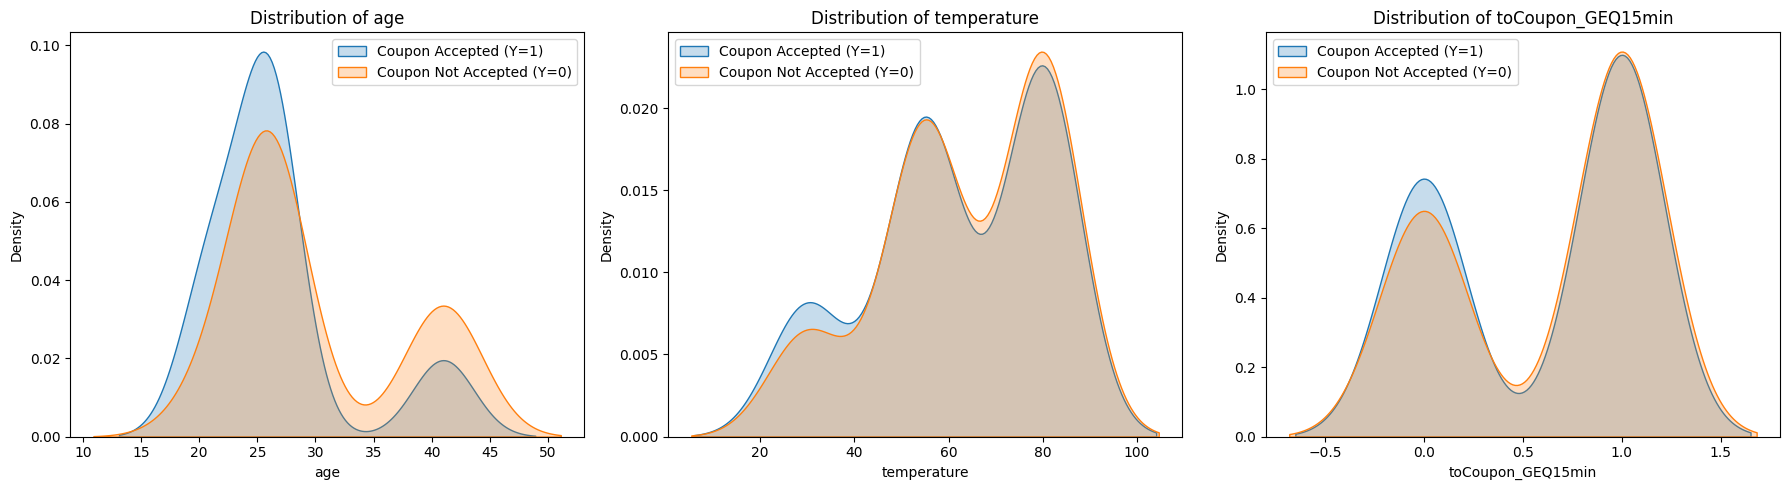

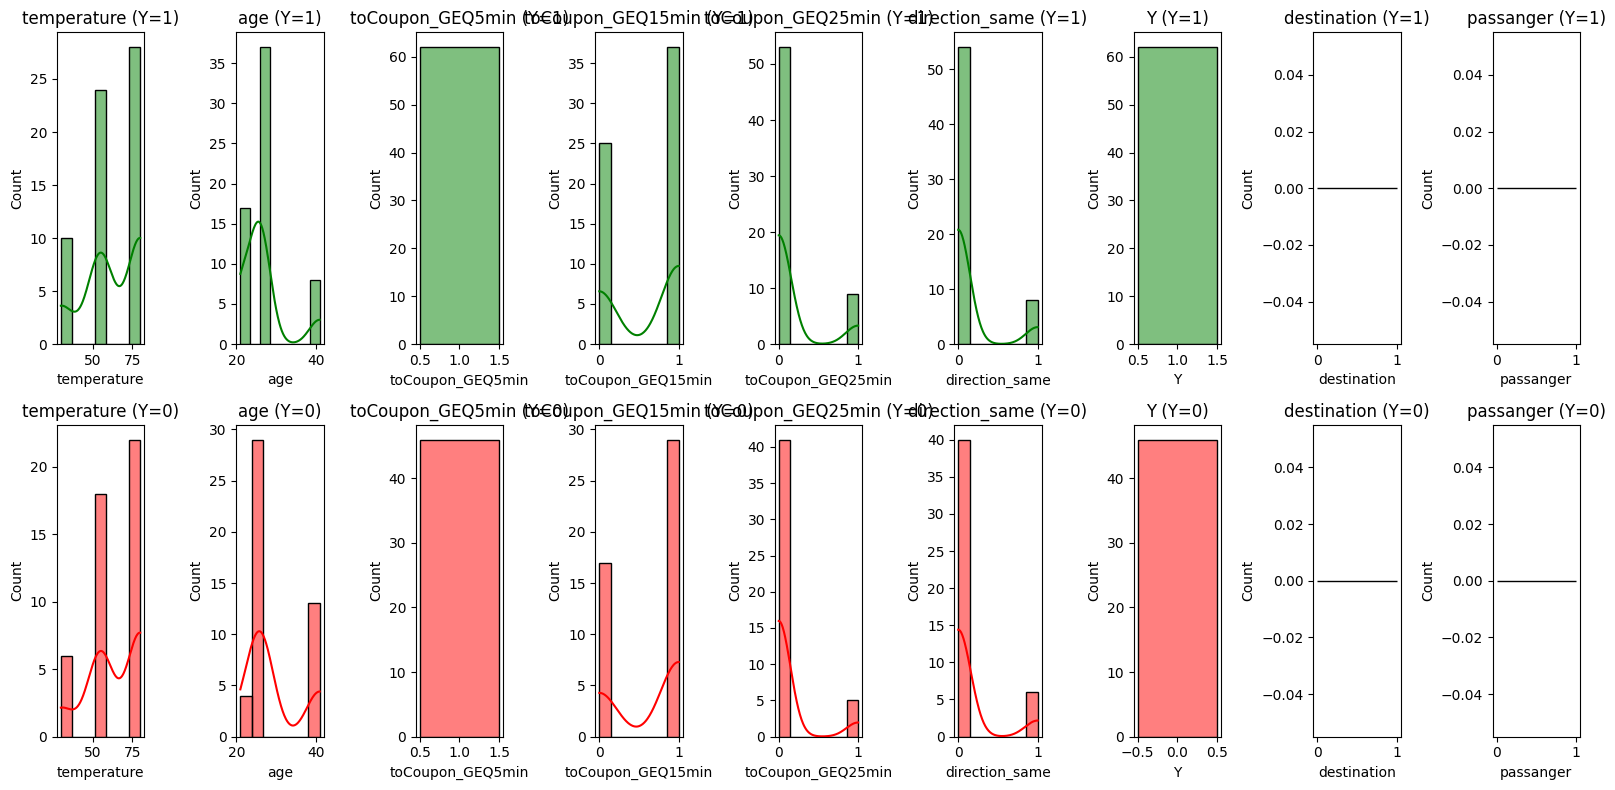

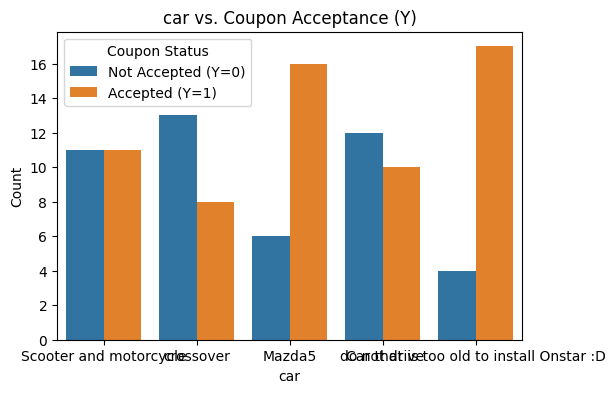

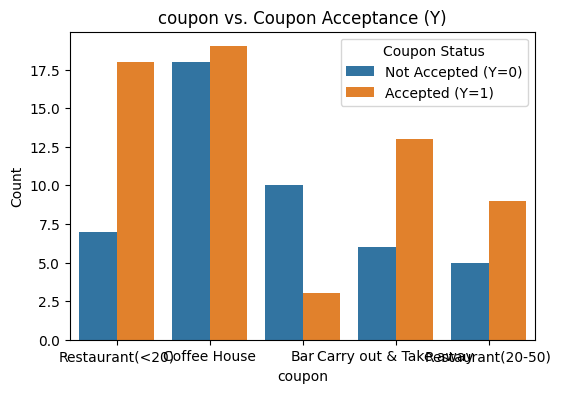

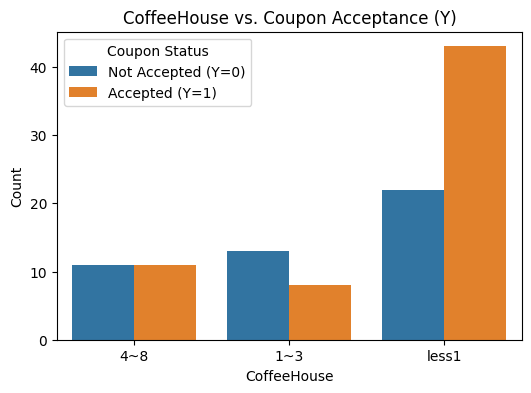

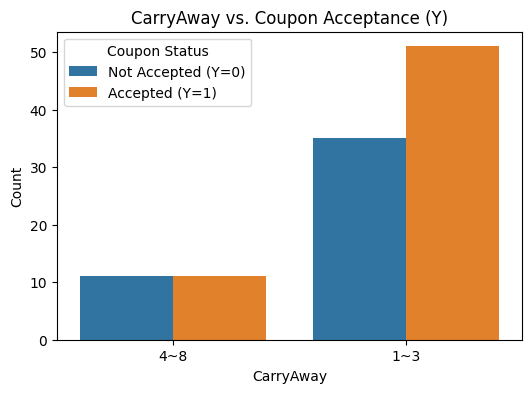

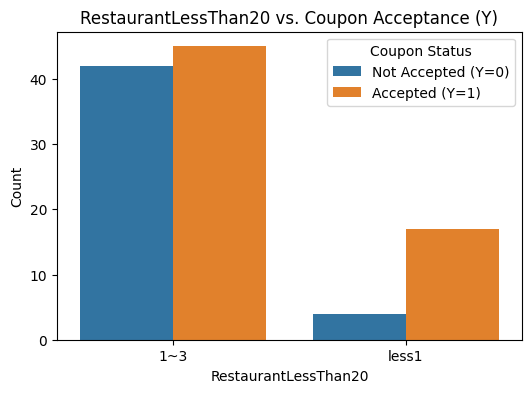

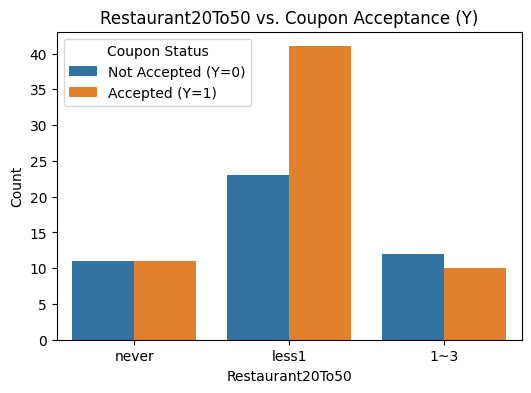

In [108]:

# Supporting Charts: KDE, Violin, Bar
# see: KDE & Violin Plots of distribution for these features ( both coupon acceptance/rejection ).

# %% [PLOTS Seaborn  kdeplot]
features_to_plot = ['age', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

plt.figure(figsize=(18, 5))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(data=cpnYes, x=feature, label='Coupon Accepted (Y=1)', fill=True)
    sns.kdeplot(data=cpnNo,  x=feature, label='Coupon Not Accepted (Y=0)', fill=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.savefig("./4_top3_features_accepting_coupon.png")  # Save plot
plt.show()

# Violin plot confirms age correlation to coupon
sns.violinplot(x='Y', y='age', data=cpn, hue='Y', palette='Set2', legend=True)
plt.title("Age Density by Coupon Acceptance")
plt.xlabel("Coupon Acceptance (Y)")
plt.ylabel("Age")
plt.show()
# Violin plot confirms toCoupon_GEQ15min correlation to coupon
sns.violinplot(x='Y', y='toCoupon_GEQ15min', data=cpnYes, hue='Y', palette='Set2', legend=True)
plt.title("toCoupon_GEQ15min Density by Coupon Acceptance")
plt.xlabel("Coupon Acceptance (Y)")
plt.ylabel("toCoupon_GEQ15min")
plt.show()
# Violin plot confirms toCoupon_GEQ25min correlation to coupon
sns.violinplot(x='Y', y='toCoupon_GEQ25min', data=cpnYes, hue='Y', palette='Set2', legend=True)
plt.title("toCoupon_GEQ25min Density by Coupon Acceptance")
plt.xlabel("Coupon Acceptance (Y)")
plt.ylabel("toCoupon_GEQ25min")
plt.show()

# Violin plot  Temp inverse correlation to coupon
sns.violinplot(x='Y', y='temperature', data=cpnYes, hue='Y', palette='Set2', legend=True)
plt.title("temperature Density by Coupon Acceptance")
plt.xlabel("Coupon Acceptance (Y)")
plt.ylabel("temperature")
plt.show()


# Violin plot  Temp inverse correlation to coupon
sns.violinplot(x='Y', y='direction_same', data=cpnYes, hue='Y', palette='Set2', legend=True)
plt.title("Direction_same Density by Coupon Acceptance")
plt.xlabel("Coupon Acceptance (Y)")
plt.ylabel("direction_same")
plt.show()


#DBL check corr matrix# Compute the correlation matrix

# yescorr_matrix = cpnYes.corr()

# Assume 'Y' is your coupon acceptance column (with 1 indicating acceptance)
# Get correlations of all features with Y, excluding Y itself
# target_corr = yescorr_matrix['Y'].drop('Y')

# Find the feature with the highest absolute correlation with Y
# most_corr_feature = target_corr.abs().idxmax()
# yescorrelation_value = target_corr[most_corr_feature]
# yescorrelation_value


#nocorr_matrix = cpnNo.corr()
# Assume 'Y' is your coupon rejection column (with 0 indicating rejection)
# Get correlations of all features with Y, excluding Y itself
# target_corr = nocorr_matrix['Y'].drop('Y')

# Find the feature with the highest absolute correlation with Y
# most_corr_feature = target_corr.abs().idxmax()
# nocorrelation_value = target_corr[most_corr_feature]
# nocorrelation_value

# %% [markdown]
# ## Coupon Non-Acceptance Analysis
#
# Features with negative correlations (i.e., more associated with coupon non-acceptance).
#  visualize top three features associated with coupon rejection.

# %% [code]
negative_corr_features = corr_matrix['Y'].drop('Y').sort_values()
print("\nFeatures sorted by correlation with Y=1 Coupon Acceptance (ascending):")
print(negative_corr_features)

# top3_not_accept = negative_corr_features.head(3)
# print("\nTop 3 features most correlated with coupon not accepted (Y=0):")
# print(top3_not_accept)

features_to_plot_not_accept = top3_not_accept.index.tolist()

plt.figure(figsize=(18, 5))
for i, feature in enumerate(features_to_plot_not_accept):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(data=cpnYes, x=feature, label='Coupon Accepted (Y=1)', fill=True)
    sns.kdeplot(data=cpnNo,  x=feature, label='Coupon Not Accepted (Y=0)', fill=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.savefig("./5_top3_features_not_accepting_coupon.png")  # Save plot
plt.show()

# %% [markdown]
# ## Additional Feature Exploration
#
# Histograms are plotted for each numeric feature for both coupon accepted and non-accepted groups.
# This helps to further understand the distribution differences.

# %% [code]
fig, axes = plt.subplots(nrows=2, ncols=len(numeric_cols), figsize=(16, 8))
for i, col in enumerate(numeric_cols):
    sns.histplot(cpnYes[col], ax=axes[0, i], kde=True, color='green')
    axes[0, i].set_title(f"{col} (Y=1)")
    sns.histplot(cpnNo[col], ax=axes[1, i], kde=True, color='red')
    axes[1, i].set_title(f"{col} (Y=0)")
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Categorical Variable Analysis
#
# explore categorical variables and their relation to coupon acceptance using count plots.


# %% [code]
cat_cols = ['car', 'coupon', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Y', data=cpn)
    plt.title(f"{col} vs. Coupon Acceptance (Y)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title='Coupon Status', labels=['Not Accepted (Y=0)', 'Accepted (Y=1)'])
    plt.show()




In [ ]:


# Other details

# Visualize distribution of Age
# cpn['age'] = cpn['age'].str.strip("plus")
# cpn['age'] = cpn['age'].str.strip("below")
# cpn['age'].unique()  #['21', '46', '26', '31', '41', '50plus', '36', 'below21']
# cpn['age'] = cpn['age'].astype('float')
# sns.distplot(cpn['age'], bins = 20)
# plt.show()


# cpn.head()

# cpnage = cpn[['car', 'coupon']].dropna().copy()

# sns.cov(cpnage)
# sns.heapmap(cpnage)
# sns.heatmap(cpnage.cov(), annot=True, cmap='coolwarm')
# plt.show()

# car
# Bar
# CoffeeHouse
# CarryAway
# RestaurantLessThan20
# Restaurant20To50

# cpn.dtype

# cpn_clean = cpn.dropna(subset=['car','Bar', 'coupon','CoffeeHouse','CarryAway','RestaurantLessThan20', 'Restaurant20To50'  ])

# sns.boxplot(x='car', y='coupon', data=cpn_clean)
# plt.title("Coupon Distribution by Car Category")
# plt.show()

# cpn_clean = cpn.dropna(subset=['Bar', 'coupon'])
# sns.boxplot(x='Bar', y='coupon', data=cpn_clean)
# plt.title("Coupon Distribution by Bar Category")
# plt.show()

# cpn_clean = cpn.dropna(subset=['CoffeeHouse', 'coupon'])
# sns.boxplot(x='CoffeeHouse', y='coupon', data=cpn_clean)
# plt.title("Coupon Distribution by CoffeeHouse Category")
# plt.show()


# sns.scatterplot(x='car', y='coupon', data=cpn_clean)
# plt.title("Coupon Distribution by Car Category")
# plt.show()

# cpn_clean = cpn.dropna(subset=['Bar', 'coupon'])
# sns.scatterplot(x='Bar', y='coupon', data=cpn_clean)
# plt.title("Coupon Distribution by Bar Category")
# plt.show()

# cpn_clean = cpn.dropna(subset=['CoffeeHouse', 'coupon'])
# sns.scatterplot(x='CoffeeHouse', y='coupon', data=cpn_clean)
# plt.title("Coupon Distribution by CoffeeHouse Category")
# plt.show()

# sns.lineplot(x='car', y='coupon', data=cpn_clean)
# plt.title("Coupon Distribution by Car Category")
# plt.show()

# cpn_clean = cpn.dropna(subset=['Bar', 'coupon'])
# sns.lineplot(x='Bar', y='coupon', data=cpn_clean)
# plt.title("Coupon Distribution by Bar Category")
# plt.show()

# cpn_clean = cpn.dropna(subset=['CoffeeHouse', 'coupon'])
# sns.lineplot(x='CoffeeHouse', y='coupon', data=cpn_clean)
# plt.title("Coupon Distribution by CoffeeHouse Category")
# plt.show()


